The reason there are so many libraries here is I have created different versions of this model using different libraries.This was done because I was testing accurancy and speed. This one happens to be the slowest model.

I'm seperating the models and giving them their indiviual notebook. Eventually I will upload them all. 

In [1]:
import tensorflow
import lightgbm as lgb
import random
import xgboost as xgb
import eli5
import missingno as no
import os # accessing directory structure
import seaborn as sns
import cufflinks as cf 
import time

import keras
from keras.models import Sequential
from keras.layers import Dense
from scipy.stats import shapiro

from mpl_toolkits.mplot3d import Axes3D

import catboost
from catboost import Pool, CatBoostClassifier, cv

# linear algebra
import numpy as np 
from numpy import loadtxt

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd #
from pandas_profiling import ProfileReport
from pandas import read_csv, set_option

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


# plotting section

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import plotly as pp
from plotly import tools
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

#preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler as Scaler
from sklearn.preprocessing import RobustScaler

#ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

#KNN
from sklearn.neighbors import  RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Linear
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn     import datasets


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.tree import DecisionTreeClassifier

#Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

#metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline




%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")



#used to find path
#import sys
#sys.path


Duplicate key in file '/Users/tripswitch/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')
/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding 

### Data upload and prep

In [2]:
df = pd.read_csv('/Users/tripswitch/Desktop/sonar_all.csv')
df

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine


In [3]:
#Replace Rock and Mine with 1  and 0 respectivly
df = df.replace(['Rock'],1)
df = df.replace(['Mine'],0)

In [19]:
# Check for missing values
df.isnull().sum()

attribute_1     0
attribute_2     0
attribute_3     0
attribute_4     0
attribute_5     0
               ..
attribute_57    0
attribute_58    0
attribute_59    0
attribute_60    0
Class           0
Length: 61, dtype: int64

In [24]:
# Variable for Labels 
features = ['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4',
       'attribute_5', 'attribute_6', 'attribute_7', 'attribute_8',
       'attribute_9', 'attribute_10', 'attribute_11', 'attribute_12',
       'attribute_13', 'attribute_14', 'attribute_15', 'attribute_16',
       'attribute_17', 'attribute_18', 'attribute_19', 'attribute_20',
       'attribute_21', 'attribute_22', 'attribute_23', 'attribute_24',
       'attribute_25', 'attribute_26', 'attribute_27', 'attribute_28',
       'attribute_29', 'attribute_30']


In [6]:
#Seperate freatures and class
data, labels =df.iloc[:,:60],df.iloc[:,60]
'''z = dataset_pd1.iloc[:,8].values'''
y=labels
X=data

In [7]:
## EDA 

In [8]:
'''#Pandas Profiling (use for small dataset)
#Run very slow on large datasets
file_pima = ProfileReport(df)
file_pima.to_file(output_file = 'SonarDataSet.html')'''

"#Pandas Profiling (use for small dataset)\n#Run very slow on large datasets\nfile_pima = ProfileReport(df)\nfile_pima.to_file(output_file = 'SonarDataSet.html')"

In [20]:
# Describe data
set_option('precision', 3)
data.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


In [21]:
# Check the balance of the data
df.groupby('Class').size()

Class
0    111
1     97
dtype: int64

##### Data is not normal to correct this I will do scaling

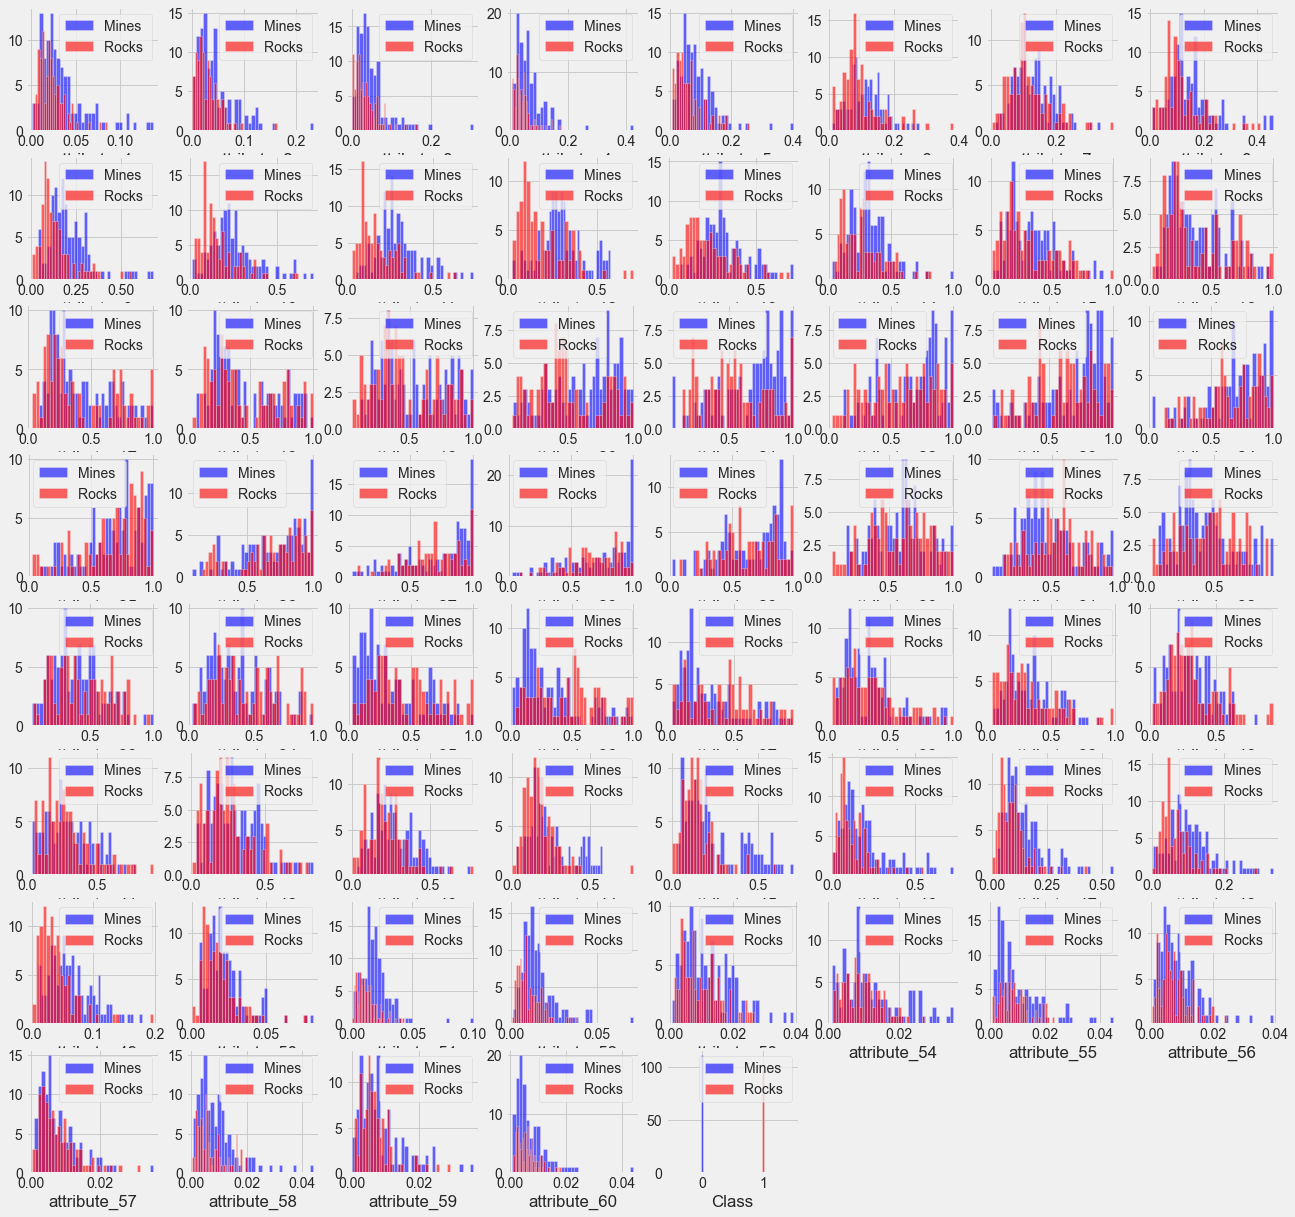

In [15]:
# Visulazing the distibution of the data for every feature
plt.figure(figsize=(20, 20))

for i, column in enumerate(df.columns, 1):
    plt.subplot(8, 8, i)
    df[df["Class"] == 0][column].hist(bins=35, color='blue', label='Mines', alpha=0.6)
    df[df["Class"] == 1][column].hist(bins=35, color='red', label='Rocks ', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [26]:
#Check one of the columns for normalacy
a1=df["attribute_2"]
stat1, p2 = shapiro(a1)
print('Statistics=%.4f, p=%.100f' % (stat1, p2))
if p2<.05 :
    print(" Attribute1 is not normally distributed \n")
else : print("Attribute1is normally distributed \n ")

Statistics=0.8164, p=0.0000000000000062783221309802798165700110644138476345688104629516601562500000000000000000000000000000
 Attribute1 is not normally distributed 



### Corralation

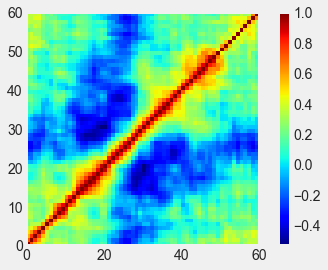

In [12]:
heatmap = plt.pcolor(data.corr(), cmap='jet')
plt.colorbar(heatmap)
plt.gca().set_aspect('equal')
plt.show()

### Scaling 
> Tried different scalings and the results are all close


In [13]:
#data, labels= df.columns.values,df.columns.values
#https://medium.com/datadriveninvestor/increase-10-accuracy-with-re-scaling-features-in-k-nearest-neighbors-python-code-677d28032a45
data_scaled = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)
data_scaled.head(10)


,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
0,-0.400,-0.041,-0.027,-0.715,0.364,-0.101,0.522,0.298,1.125,0.021,...,0.595,-1.115,-0.598,0.681,-0.296,1.482,1.764,0.070,0.172,-0.659
1,0.704,0.422,1.056,0.323,0.778,2.607,1.523,2.511,1.318,0.589,...,-0.298,-0.522,-0.257,-0.843,0.016,1.901,1.071,-0.472,-0.445,-0.420
2,-0.129,0.601,1.723,1.172,0.401,2.093,1.969,2.852,3.233,3.066,...,-1.066,1.018,0.836,-0.198,1.232,2.827,4.120,1.309,0.253,0.258
3,-0.836,-0.649,0.482,-0.719,-0.987,-1.149,-0.194,-0.085,-1.001,-0.610,...,0.670,-0.137,-1.009,0.557,-0.112,-0.161,-0.489,-0.550,-0.639,1.035
4,2.051,0.857,0.111,-0.312,-0.292,-0.673,-0.014,1.317,1.511,1.772,...,-0.039,-1.074,-0.754,-0.061,0.242,-1.175,-0.107,-0.488,0.447,0.576
5,-0.025,0.209,-0.421,-0.786,-0.664,-0.094,-0.027,0.571,0.275,0.713,...,-0.473,-0.928,-1.322,-0.980,-1.130,0.119,-0.367,-0.813,-0.461,-0.061
6,0.111,1.739,2.303,1.872,1.664,1.127,-0.789,0.062,0.257,1.067,...,0.286,0.695,2.001,0.296,-0.324,0.975,0.239,0.984,-0.704,0.756
7,0.991,0.498,1.053,-0.474,0.733,-0.210,-0.309,-0.865,-0.267,0.563,...,-0.907,-0.554,0.183,-0.884,0.397,0.258,0.118,-0.503,-0.509,-0.241
8,-0.299,-0.028,0.119,-0.138,-0.190,-0.771,-0.754,-1.471,-0.928,-0.444,...,-0.832,0.112,0.297,0.489,-0.494,-0.580,-0.229,0.209,-0.331,-0.858
9,-0.557,-0.643,-0.238,-1.010,-1.020,-0.635,-0.262,-0.766,-0.693,-1.366,...,-0.356,-0.460,1.646,0.956,-0.126,-0.248,-0.801,-0.689,-0.380,-0.500


In [23]:
data_robust = pd.DataFrame(RobustScaler().fit_transform(data), columns=data.columns)
data_robust.head(3)


,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
0,-0.126,0.200,0.218,-0.582,0.529,0.096,0.642,0.538,1.163,0.182,...,0.750,-0.921,-0.310,0.723,-0.038,1.595,1.792,0.385,0.391,-0.387
1,1.014,0.683,1.282,0.619,0.897,2.476,1.486,2.646,1.330,0.666,...,-0.113,-0.317,-0.066,-0.493,0.239,1.984,1.197,-0.133,-0.180,-0.166
2,0.153,0.870,1.938,1.601,0.561,2.025,1.863,2.972,2.988,2.776,...,-0.855,1.249,0.718,0.022,1.321,2.842,3.814,1.570,0.466,0.461


#### k-fold cross-validation

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling (see below) is that all observations are used for both training and validation, and each observation is used for validation exactly once. 10-fold cross-validation is commonly used, but in general k remains an unfixed parameter. 


When k = n (the number of observations), k-fold cross-validation is equivalent to leave-one-out cross-validation.

In stratified k-fold cross-validation, the partitions are selected so that the mean response value is approximately equal in all the partitions. In the case of binary classification, this means that each partition contains roughly the same proportions of the two types of class labels.

In repeated cross-validation the data is randomly split into k partitions several times. The performance of the model can thereby be averaged over several runs, but this is rarely desirable in practice. 



#### Scaled dataset get better accuracy. But needs to be reformated to run with the from scratch

[0.8700564971751413, 0.826271186440678, 0.8545197740112994, 0.8107344632768362, 0.8177966101694916, 0.769774011299435, 0.8008474576271186, 0.766949152542373, 0.7867231638418078, 0.731638418079096, 0.7485875706214689, 0.7005649717514125, 0.7189265536723164, 0.6977401129943502, 0.7090395480225988, 0.690677966101695, 0.6963276836158192, 0.7062146892655367, 0.7132768361581922, 0.711864406779661, 0.6991525423728814, 0.6963276836158191, 0.7090395480225988, 0.7019774011299434, 0.7048022598870056, 0.6991525423728814, 0.7048022598870056, 0.6949152542372882, 0.713276836158192, 0.7005649717514123]


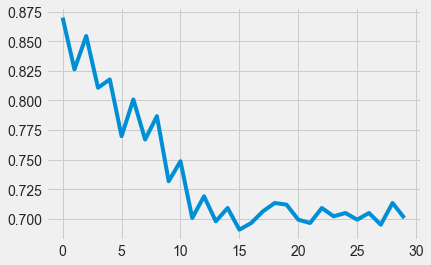

In [44]:
# Search for optimal K value for K Nearest Neighbor
# Range of K to input
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn,data_scaled,y, cv=59, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

plt.plot(k_scores)
plt.show()

#### In k-NN classification:
> The output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

#### In k-NN regression:
> The output is the property value for the object. This value is the average of the values of k nearest neighbors.

{'n_neighbors': 1}
0.8745762711864407


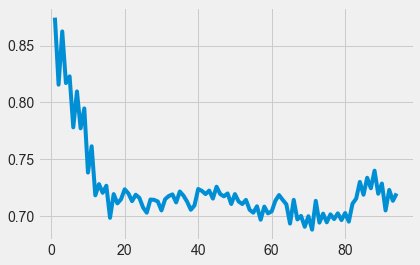

In [58]:
#Creates a knn model
knnR = KNeighborsClassifier()
# Dictionary of k-n_neighbors 
param_Grid = {'n_neighbors': np.arange(1,95)}
cv = RepeatedKFold(n_splits=59, n_repeats=5, random_state=3)
#print(cv)
#Gridsearch to test results of k-n_neighbors
knn1 = GridSearchCV(knnR, param_Grid, cv=cv)
# Fits model to data
knn1.fit(data_scaled, y)

#Finds top k-n_neighbors 
print(knn1.best_params_)
print(knn1.best_score_)

plt.plot(knn1.cv_results_['param_n_neighbors'], knn1.cv_results_['mean_test_score'])
plt.show()


> ##### https://machinelearningmastery.com/implementing-stacking-scratch-python/
>This runs really slow depending on your computing power. But the purpose of this
>is to get a deeper understanding of how stacking works.

>I tried various values for neighbors and Folds and 1 neighbor with 59 folds returns the highest accuracy 

The learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0.

The learning rate controls how quickly the model is adapted to the problem. Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs.

A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck.



##  NOTE: Google Colab is the better option for from scratch functions
The from scratch model runs faster in Google Colab because you have the option to switch to GPU

In [70]:
# Test stacking on the sonar dataset
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from math import exp
import pandas as pd

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup


# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split


# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Locate neighbors for a new row
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
    
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# Make a prediction with kNN
def knn_predict(model, test_row, num_neighbors=1):
	neighbors = get_neighbors(model, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

# Prepare the kNN model
def knn_model(train):
	return train

# Make a prediction with weights
def perceptron_predict(model, row):
	activation = model[0]
	for i in range(len(row)-1):
		activation += model[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def perceptron_model(train, l_rate=0.04, n_epoch=500):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			prediction = perceptron_predict(weights, row)
			error = row[-1] - prediction
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
	return weights

# Make a prediction with coefficients
def logistic_regression_predict(model, row):
	yhat = model[0]
	for i in range(len(row)-1):
		yhat += model[i + 1] * row[i]
	return 1.0 / (1.0 + exp(-yhat))

# Estimate logistic regression coefficients using stochastic gradient descent
def logistic_regression_model(train, l_rate=0.01, n_epoch=500):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			yhat = logistic_regression_predict(coef, row)
			error = row[-1] - yhat
			coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
	return coef

# Make predictions with sub-models and construct a new stacked row
def to_stacked_row(models, predict_list, row):
	stacked_row = list()
	for i in range(len(models)):
		prediction = predict_list[i](models[i], row)
		stacked_row.append(prediction)
	stacked_row.append(row[-1])
	return row[0:len(row)-1] + stacked_row

# Stacked Generalization Algorithm
def stacking(train, test):
	model_list = [knn_model, perceptron_model]
	predict_list = [knn_predict, perceptron_predict]
	models = list()
	for i in range(len(model_list)):
		model = model_list[i](train)
		models.append(model)
	stacked_dataset = list()
	for row in train:
		stacked_row = to_stacked_row(models, predict_list, row)
		stacked_dataset.append(stacked_row)
	stacked_model = logistic_regression_model(stacked_dataset)
	predictions = list()
	for row in test:
		stacked_row = to_stacked_row(models, predict_list, row)
		stacked_dataset.append(stacked_row)
		prediction = logistic_regression_predict(stacked_model, stacked_row)
		prediction = round(prediction)
		predictions.append(prediction)
	return predictions




# Test stacking on the sonar dataset
seed(1)
# load and prepare data
filename = 'sonar.all-data.csv'
dataset = load_csv(filename)
#dataset1 = finalDf
# convert string attributes to integers
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)

n_folds = 10
scores = evaluate_algorithm(dataset, stacking, n_folds)
print('Scores: %s' % scores)
print('Mean Accuracy: %.5f%%' % (sum(scores)/float(len(scores))))






Scores: [80.0, 75.0, 90.0, 85.0, 90.0, 85.0, 90.0, 70.0, 90.0, 75.0]
Mean Accuracy: 83.000%
